# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [45]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
%matplotlib inline

In [46]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [47]:
# Información
names = ['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL','BAC','BBY','KO','CL','COST','EA','DIS','NFLX','PFE','SBUX','^GSPC']
start = '2015-01-01'
end = '2019-12-31'

In [48]:
#Precios diarios de las 15 compañías
closes = get_adj_closes(tickers=names,
                       start_date=start,
                       end_date=end)
closes.head()

Symbols,AAPL,AMZN,BAC,BBY,CL,COST,DIS,EA,FB,GOOGL,KO,MSFT,NFLX,PFE,SBUX,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-02,24.941502,308.519989,16.126829,32.477043,60.399689,124.026451,87.376266,46.869999,78.449997,529.549988,35.171711,41.647892,49.848572,25.397703,36.724155,2058.199951
2015-01-05,24.238857,302.190002,15.658340,31.639788,59.953506,122.616356,86.099403,46.570000,77.190002,519.460022,35.171711,41.264908,47.311428,25.259901,36.020691,2020.579956
2015-01-06,24.241146,295.290009,15.189854,31.355127,59.323627,124.236641,85.642708,45.959999,76.150002,506.640015,35.438805,40.659245,46.501427,25.470665,35.727585,2002.609985
2015-01-07,24.581060,298.420013,15.261930,32.259354,59.796043,126.399971,86.518814,46.810001,76.150002,505.149994,35.881165,41.175831,46.742859,25.819241,36.606911,2025.900024
2015-01-08,25.525522,300.459991,15.577259,32.744965,60.609665,127.485947,87.413536,48.130001,78.180000,506.910004,36.315170,42.387146,47.779999,26.346167,37.197636,2062.139893


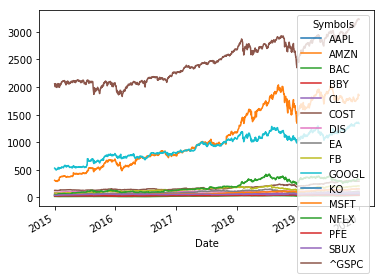

In [49]:
closes.plot()

## Podemos ver la progresión de los precios de las acciones y de los puntos del Índice SP500  desde 2015 hasta 2019

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [50]:
# Rendimientos porcentuales diarios de las 15 compañías
ret = closes.pct_change().dropna()
ret.head()

Symbols,AAPL,AMZN,BAC,BBY,CL,COST,DIS,EA,FB,GOOGL,KO,MSFT,NFLX,PFE,SBUX,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-05,-0.028172,-0.020517,-0.029050,-0.025780,-0.007387,-0.011369,-0.014613,-0.006401,-0.016061,-0.019054,0.000000,-0.009196,-0.050897,-0.005426,-0.019155,-0.018278
2015-01-06,0.000094,-0.022833,-0.029919,-0.008997,-0.010506,0.013214,-0.005304,-0.013099,-0.013473,-0.024679,0.007594,-0.014677,-0.017121,0.008344,-0.008137,-0.008893
2015-01-07,0.014022,0.010600,0.004745,0.028838,0.007963,0.017413,0.010230,0.018494,0.000000,-0.002941,0.012482,0.012705,0.005192,0.013685,0.024612,0.011630
2015-01-08,0.038422,0.006836,0.020661,0.015053,0.013607,0.008592,0.010341,0.028199,0.026658,0.003484,0.012096,0.029418,0.022188,0.020408,0.016137,0.017888
2015-01-09,0.001072,-0.011749,-0.017929,-0.026847,-0.009815,-0.015388,0.004904,-0.012882,-0.005628,-0.012211,-0.011032,-0.008405,-0.015458,0.004615,-0.032731,-0.008404


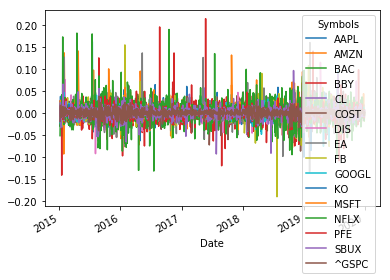

In [51]:
ret.plot()

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [52]:
#Rendimientos medios diarios (media aritmética)
ret.mean()

Symbols
AAPL     0.000976
AMZN     0.001593
BAC      0.000737
BBY      0.001019
CL       0.000149
COST     0.000751
DIS      0.000479
EA       0.000850
FB       0.000924
GOOGL    0.000850
KO       0.000387
MSFT     0.001161
NFLX     0.001829
PFE      0.000386
SBUX     0.000767
^GSPC    0.000395
dtype: float64

In [53]:
# Volatilidad diaria (desviación estándar)
ret.std()

Symbols
AAPL     0.015646
AMZN     0.018426
BAC      0.016196
BBY      0.022053
CL       0.010848
COST     0.011760
DIS      0.012541
EA       0.019540
FB       0.017776
GOOGL    0.014977
KO       0.008918
MSFT     0.014686
NFLX     0.026253
PFE      0.011363
SBUX     0.012988
^GSPC    0.008466
dtype: float64

In [54]:
# Resumen en base anual. 
ret_summary = pd.DataFrame({'Media': ret.mean(), 'Vol': ret.std()})
ret_summary

,Media,Vol
Symbols,,
AAPL,0.000976,0.015646
AMZN,0.001593,0.018426
BAC,0.000737,0.016196
BBY,0.001019,0.022053
CL,0.000149,0.010848
COST,0.000751,0.011760
DIS,0.000479,0.012541
EA,0.000850,0.019540
FB,0.000924,0.017776


In [55]:
#Ahora vamos a anualizar y reportar media y volatilidad en otro Data Frame
annual_ret_summary = pd.DataFrame({'Media': 252*ret.mean(), 'Vol': np.sqrt(252) *ret.std()})
annual_ret_summary

,Media,Vol
Symbols,,
AAPL,0.246032,0.248374
AMZN,0.401331,0.292501
BAC,0.185644,0.257098
BBY,0.256741,0.350074
CL,0.037465,0.172208
COST,0.189218,0.186678
DIS,0.120806,0.199080
EA,0.214214,0.310193
FB,0.232967,0.282188


### Podemos ver que tanto el rendimiento medio anual como la volatilidad anual del SP 500, son más pequeños que la mayor parte de las de las acciones que lo componen, por lo que podríamos decir que hay menos riesgo asociado al tenerlo

## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

In [56]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Rendimiento Esperado contra Volatilidad SP 500 y 15 Compañías')

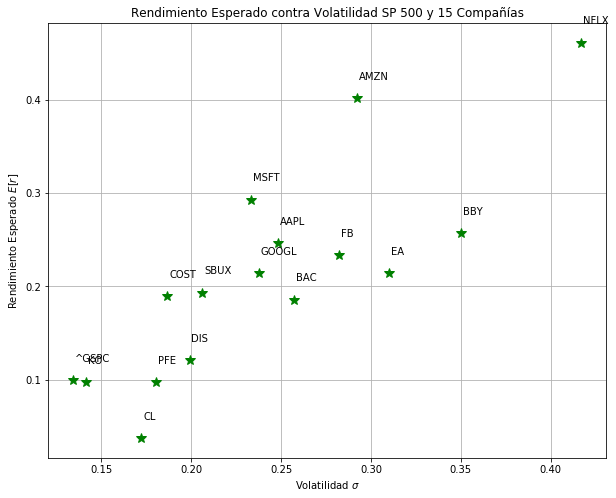

In [87]:
# Gráfico rendimiento esperado vs. volatilidad
plt.figure(figsize=(10, 8));
for i in range(len(annual_ret_summary)):
    plt.plot(annual_ret_summary.iloc[i,1], annual_ret_summary.iloc[i, 0], '*g', ms=10)
    plt.text(annual_ret_summary.iloc[i,1]+0.001, annual_ret_summary.iloc[i, 0]+.02, annual_ret_summary.index[i])


plt.grid()

plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento Esperado $E[r]$")
plt.title('Rendimiento Esperado contra Volatilidad SP 500 y 15 Compañías')

In [76]:
# Importar el módulo optimize de la librería scipy
from scipy.optimize import minimize

In [77]:
# Funcion objetivo y condicion inicial
def min_sq(beta, y, x):
    f_hat = beta[0] + beta[1] * x
    sum_sq = ((y - f_hat)**2).sum()
    return sum_sq
x0 = [0, 0]

In [78]:
# Resolver problema de optimizacion
resultado = minimize(fun=min_sq,
                    x0=x0,
                    args=(annual_ret_summary['Media'], 
                          annual_ret_summary['Vol']))


In [79]:
resultado

      fun: 0.057675294932481386
 hess_inv: array([[ 0.36041796, -1.36848382],
       [-1.36848382,  5.68933858]])
      jac: array([-9.31322575e-10,  1.86264515e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.08311842,  1.21320458])

In [80]:
beta = resultado.x
beta

array([-0.08311842,  1.21320458])

Text(0.5, 1.0, 'Rendimiento Esperado contra Volatilidad SP 500 y 15 Compañías con mc ajustados')

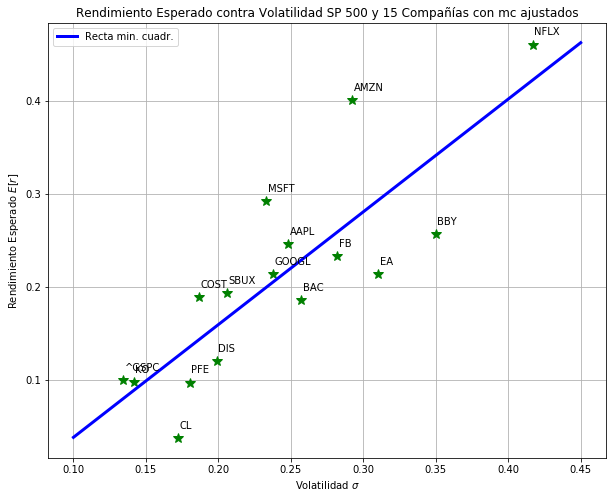

In [90]:
# Gráfico rendimiento esperado vs. volatilidad
plt.figure(figsize=(10, 8));
for i in range(len(annual_ret_summary)):
    plt.plot(annual_ret_summary.iloc[i,1], annual_ret_summary.iloc[i, 0], '*g', ms=10)
    plt.text(annual_ret_summary.iloc[i,1]+0.001, annual_ret_summary.iloc[i, 0]+.01, annual_ret_summary.index[i])

x = np.linspace(0.1, 0.45)
plt.plot(x, beta[0] + beta[1] * x, "-b", lw = 3, label = "Recta min. cuadr.")

plt.grid()
plt.legend(loc='best')

plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento Esperado $E[r]$")
plt.title('Rendimiento Esperado contra Volatilidad SP 500 y 15 Compañías con mc ajustados')

**¿Qué se puede concluir acerca de la relación entre riesgo (medido con la volatilidad) y el rendimiento esperado (medido con la media)?**
$$\beta_0 = -0.08311842$$ 
$$\beta_1 = 1.21320458$$ 
Respuestas:
- La pendiente de la recta es positiva, lo que confirma la relación positiva entre rendimiento esperado y riesgo
- Si el mercado solo estuviera afectado por los 16 activos analizados, la tasa libre de riesgo sería de $-8.3\%$ anual
- Por cada unidad de riesgo (volatilidad) el rendimiento esperado aumenta en un $121\%$

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>